# _________Task 5 SALES PREDICTION USING PYTHON _________

# Importing Libraries:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

# Loading Dataset:

In [19]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [77]:
print('Rows ---->',df.shape[0])
print('column --->',df.shape[1])

Rows ----> 200
column ---> 4


# Preprocessing:

**Pairplot**


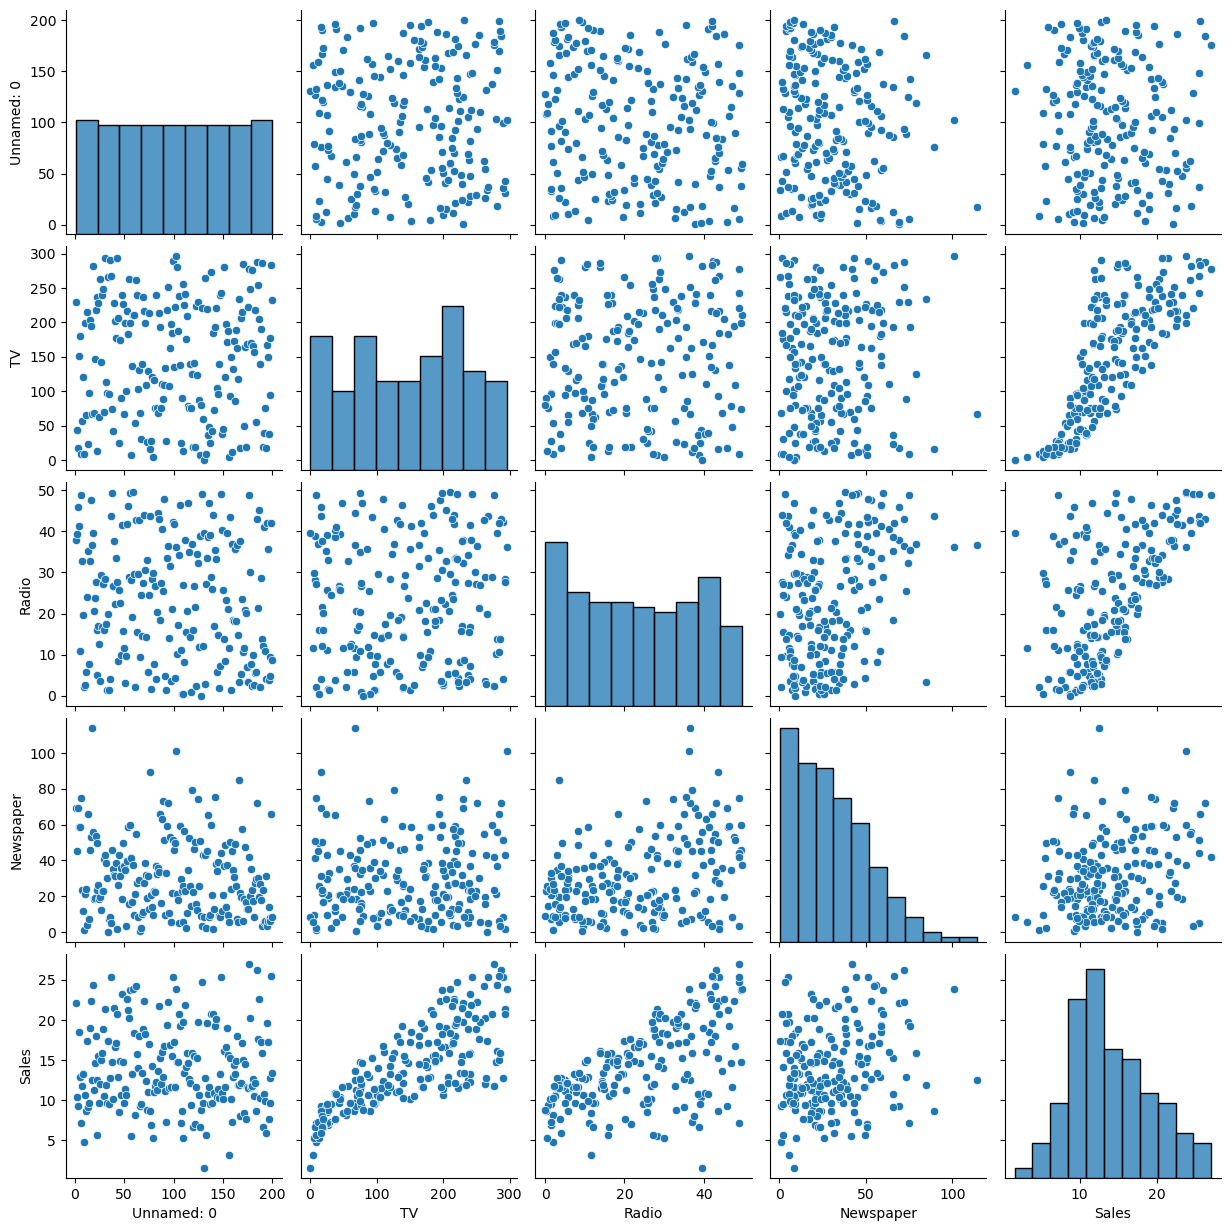

In [14]:
print(sns.pairplot(df))

**Histogram**

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'TV'}>],
       [<AxesSubplot:title={'center':'Radio'}>,
        <AxesSubplot:title={'center':'Newspaper'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

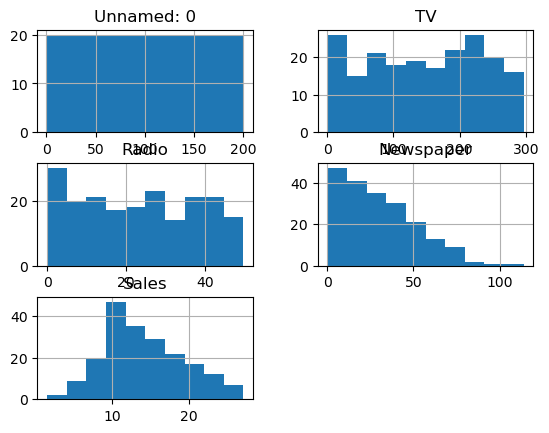

In [12]:
df.hist()

# Displaying a concise summary of information about the DataFrame:

In [20]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

# Dimensions of the DataFrame:

In [17]:
df.shape

(200, 5)

# Counting the number of missing (NaN) values in each column of a DataFrame

In [18]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# Data Visualisation

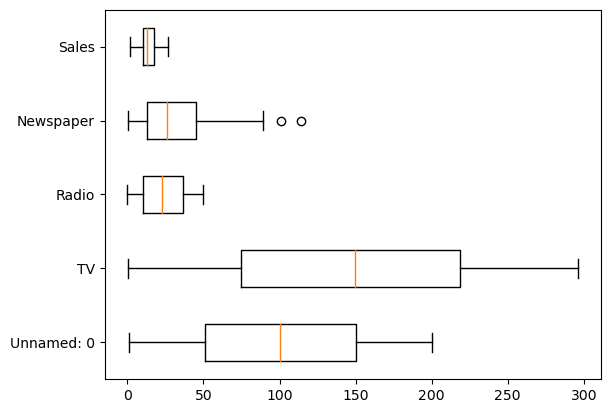

In [65]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

**Correlation Matrix:A correlation matrix is a tabular representation that shows the correlation coefficients between a set of variables**

<AxesSubplot:>

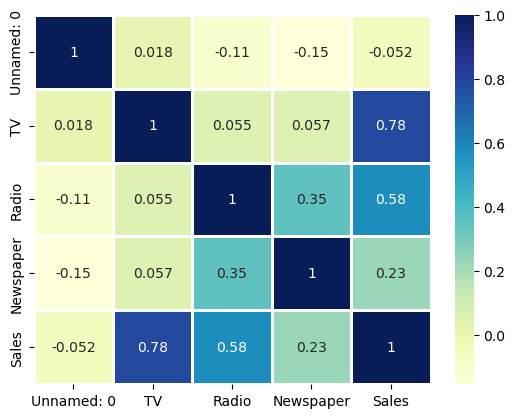

In [35]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=1)

**HeatMap: Heatmaps are particularly useful for visualizing relationships, patterns, and distributions within the data.**

<AxesSubplot:>

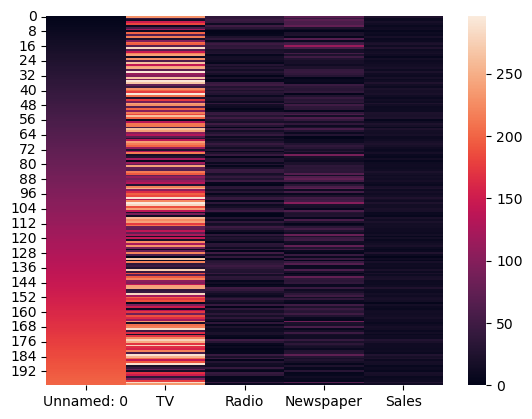

In [32]:
sns.heatmap(df)

**lmplot: 
The lmplot function is provided by the Seaborn library in Python for creating linear regression plots with additional options for visualizing relationships between variables. It's an extension of the basic regplot function in Seaborn, allowing you to create scatterplots with linear regression lines and other customization**

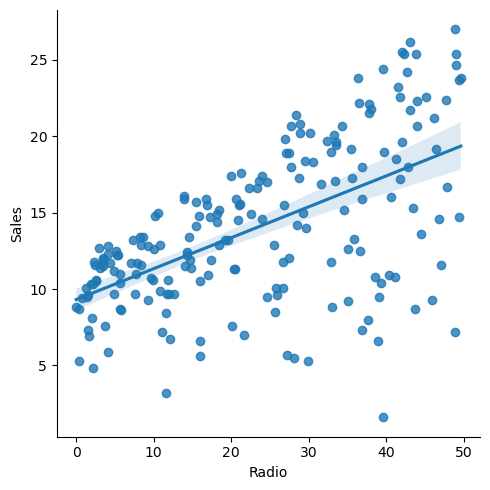

In [30]:
sns.lmplot(data=df,x='Radio',y="Sales")

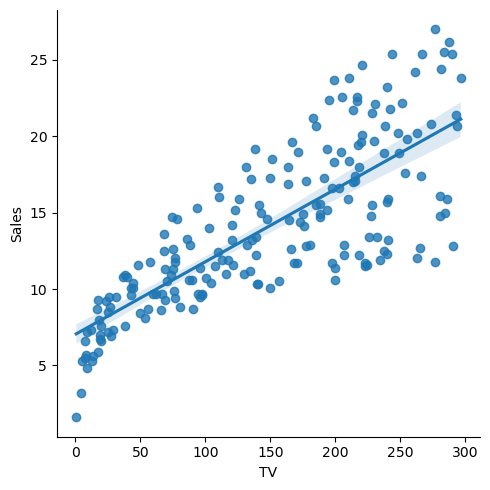

In [31]:
sns.lmplot(data=df,x='TV',y="Sales")

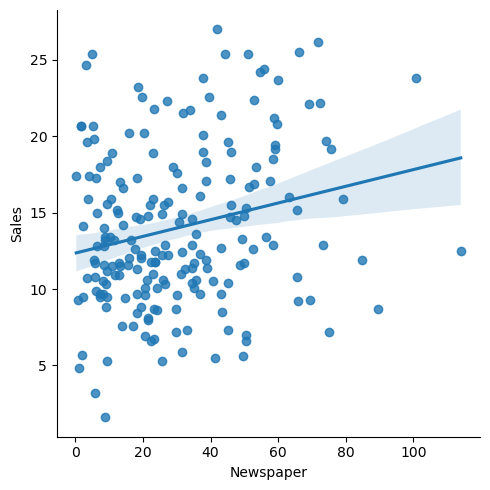

In [42]:
sns.lmplot(data=df,x='Newspaper',y="Sales") 

**displot function: It is designed to create distribution plots (histograms and kernel density estimates) of univariate data.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

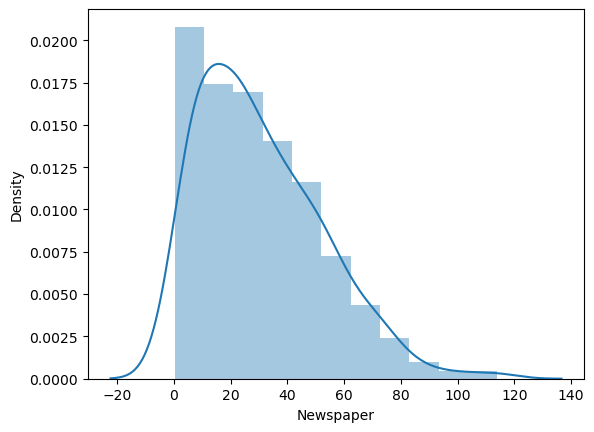

In [66]:
sns.distplot(df['Newspaper'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Radio', ylabel='Density'>

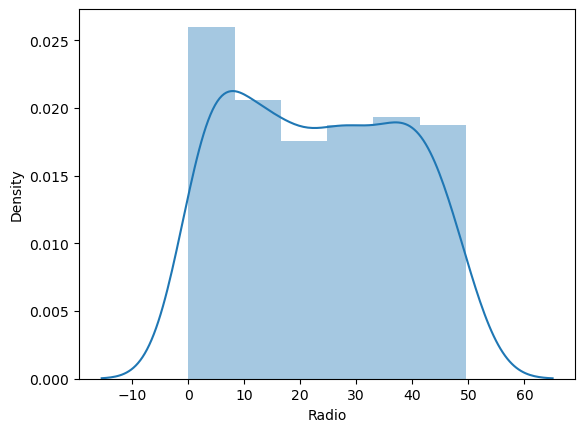

In [67]:
sns.distplot(df['Radio'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

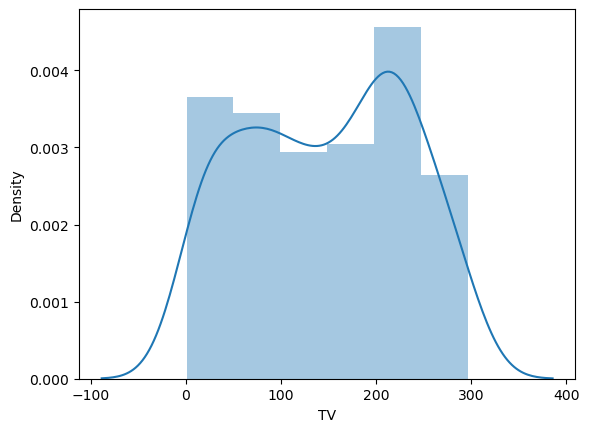

In [69]:
sns.distplot(df['TV'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

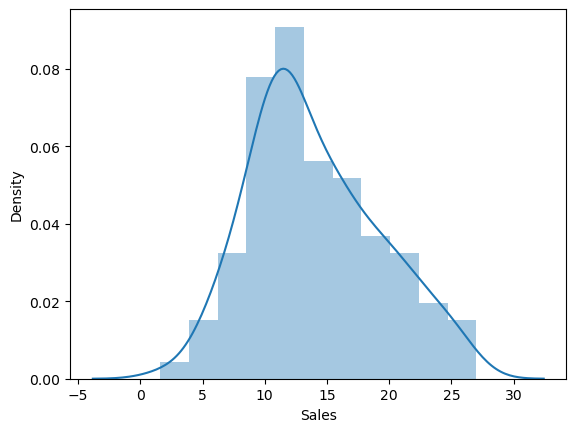

In [70]:
sns.distplot(df['Sales'])

'scatter plot'

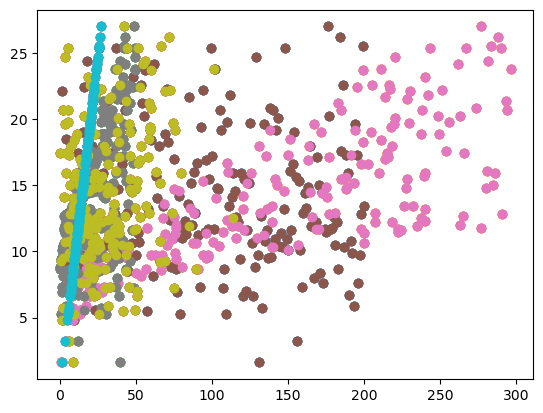

In [72]:
def scatter():
    l=df.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'Sales',data=df)
    return 'scatter plot'
scatter()

# Training The Model:

In [46]:
from sklearn.model_selection import train_test_split
x=df[['TV','Radio','Newspaper']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

# Random Forest Regression Model:

In [47]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train,y_train )
y_predict=rf.predict(x_test)

In [48]:
actual_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()})
actual_predict.head(20)

,Actual,Predict
0,11.3,10.7360
1,8.4,9.3951
2,8.7,9.3122
3,25.4,25.0881
4,11.7,12.4770
5,8.7,8.9946
6,7.2,7.9889
7,13.2,12.8059
8,9.2,8.4126
9,16.6,16.3383


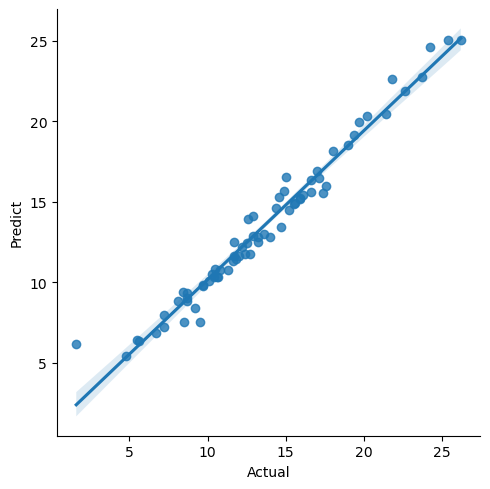

In [50]:
sns.lmplot(data=actual_predict,x='Actual',y="Predict")

# Model Evaluation:

**Assessing the performance of the trained model**

In [64]:
print("Mean_absolute_error       -->",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error        -->",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error -->",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score                  -->",r2_score(y_test,y_predict))

Mean_absolute_error       --> 0.6536685714285809
Mean_squared_error        --> 0.8499398560000067
Squre_Mean_absolute_error --> 0.8084977250608569
r2_score                  --> 0.9667695437283106
